# Описание проекта  

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. В вашем распоряжении данные с параметрами добычи и очистки. 

1. Флотация
Во флотационную установку подаётся смесь золотосодержащей руды. После обогащения получается черновой концентрат и «отвальные хвосты», то есть остатки продукта с низкой концентрацией ценных металлов.
На стабильность этого процесса влияет непостоянное и неоптимальное физико-химическое состояние флотационной пульпы (смеси твёрдых частиц и жидкости).
2. Очистка 
Черновой концентрат проходит две очистки. На выходе получается финальный концентрат и новые отвальные хвосты.  

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.  
  
Данные находятся в трёх файлах:  
 - *gold_recovery_train_new.csv* — обучающая выборка;  
 - *gold_recovery_test_new.csv* — тестовая выборка;  
 - *gold_recovery_full_new.csv* — исходные данные.

## Подготовка данных

In [1]:
import pandas as pd
from joblib import dump
import numpy as np
from sklearn.metrics import make_scorer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.utils import shuffle
from sklearn.model_selection import GridSearchCV

plt.style.use('dark_background')

In [2]:
df = pd.read_csv('gold_recovery_full_new.csv')
dtest = pd.read_csv('gold_recovery_test_new.csv')
dtrain = pd.read_csv('gold_recovery_train_new.csv')

In [3]:
df.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [4]:
dtrain.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [5]:
dtest.head()

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


In [7]:
dtrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


In [8]:
dtest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

Проанализируем признаки, недоступные в тестовой выборке

In [9]:
set(dtrain.columns) - set(dtest.columns)

{'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

Данные которых нет в тестовой выборке являются количественными признаками исходных продуктов таких как отвальные хвосты, черновой концентрат, финальный концентрат. Некоторые параметры недоступны, потому что замеряются и/или рассчитываются значительно позже. Из-за этого в тестовой выборке отсутствуют некоторые признаки, которые могут быть в обучающей.

### Расчёт эффективности

Проверим, что эффективность обогащения рассчитана правильно. Вычислим её на обучающей выборке для признака *rougher.output.recovery*. Найдем MAE между расчётами и значением признака.
Формула рачсета: $\frac{c(f-t)}{f(c-t)}100$  
c-доля золота в концентрате после флотации/очистки  
f-доля золота в сырье/концентрате до флотации/очистки  
t-доля золота в отвальных хвостах после флотации/очистки

In [10]:
def recov(c, f, t):
    return c * (f - t) * 100 / (f * (c - t))

In [11]:
recovery = recov(dtrain['rougher.output.concentrate_au'], dtrain['rougher.input.feed_au'], dtrain['rougher.output.tail_au'])

<AxesSubplot:>

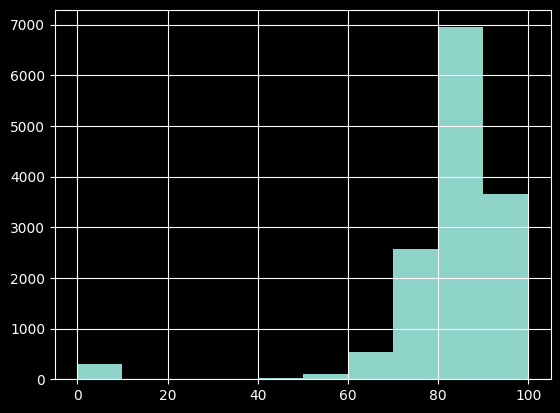

In [12]:
recovery.hist()

In [13]:
mae = (dtrain['rougher.output.recovery'] - recovery).abs().mean()
mae

1.1131451184435918e-14

Разница между эффективностью обогащения в таблице и расчетной незначительно мала, можем считать их равными. 

## Обработка пропусков

В производственном процессе обычно соседние значения в одном и том же признаке близки друг к другу, поэтому заполним пропуски предыдущим известным значением

In [14]:
dtrain.fillna(method='ffill', inplace=True)

In [15]:
df.fillna(method='ffill', inplace=True)

In [16]:
dtest.fillna(method='ffill', inplace=True)

Вычислили эффективность после флотации по предоставленной формуле и среднее абсолютное отклонение по сравнению с данными из таблицы можно считать равным нулю настолько оно настолько малое. И заполнены пропуски.

## Анализ данных

### Взглянем как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки

In [17]:
df_rougher_input_feed =  df.loc[:, ['rougher.input.feed_ag', 'rougher.input.feed_pb', 'rougher.input.feed_au']]
df_rougher_concentrate = df.loc[:, ['rougher.output.concentrate_ag', 'rougher.output.concentrate_pb', 'rougher.output.concentrate_au']]
df_primary_cleaner_concentrate = df.loc[:, ['primary_cleaner.output.concentrate_ag', 'primary_cleaner.output.concentrate_pb', 'primary_cleaner.output.concentrate_au']]
df_final_concentrate = df.loc[:, ['final.output.concentrate_ag', 'final.output.concentrate_pb', 'final.output.concentrate_au']]

In [18]:
df_rougher_concentrate.set_axis(['ag', 'pb', 'au'], axis='columns', inplace=True)
df_primary_cleaner_concentrate.set_axis(['ag', 'pb', 'au'], axis='columns', inplace=True)
df_final_concentrate.set_axis(['ag', 'pb', 'au'], axis='columns', inplace=True)
df_rougher_input_feed.set_axis(['ag', 'pb', 'au'], axis='columns', inplace=True)

Заменили названия столбцов

In [19]:
df_rougher_concentrate['step_cleaner'] = 'rougher'
df_primary_cleaner_concentrate['step_cleaner'] = 'primary_cleaner'
df_final_concentrate['step_cleaner'] = 'final'
df_rougher_input_feed['step_cleaner'] = 'input'

Добавили категориальный признак - этап очистки

In [20]:
df_concentrate = pd.concat([df_rougher_concentrate, df_primary_cleaner_concentrate, df_final_concentrate, df_rougher_input_feed])

In [21]:
df_concentrate.head()

,ag,pb,au,step_cleaner
0,11.500771,7.101074,19.793808,rougher
1,11.615865,7.278807,20.050975,rougher
2,11.695753,7.216833,19.737170,rougher
3,11.915047,7.175616,19.320810,rougher
4,12.411054,7.240205,19.216101,rougher


In [22]:
df_group = df_concentrate.groupby('step_cleaner').mean()

In [23]:
df_group

,ag,pb,au
step_cleaner,,,
final,5.168387,9.978821,44.076513
input,8.794927,3.585096,8.266097
primary_cleaner,8.442408,9.810317,32.119400
rougher,11.994759,7.606272,19.772000


Переставим наши индексы в хронологическом порядке

In [24]:
df_group = shuffle(df_group, random_state=25)

<AxesSubplot:xlabel='step_cleaner'>

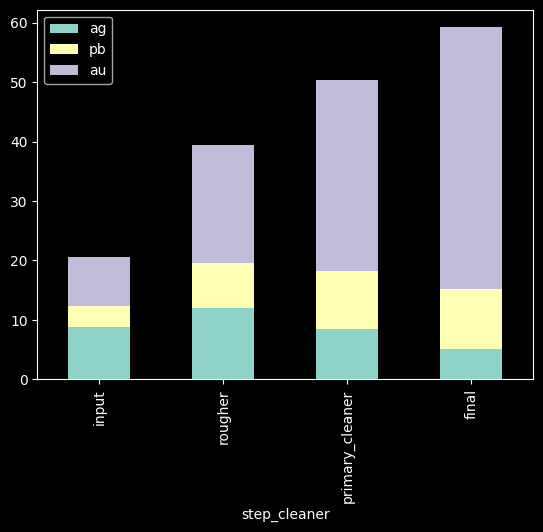

In [25]:
df_group.plot.bar(stacked=True)

<AxesSubplot:xlabel='step_cleaner'>

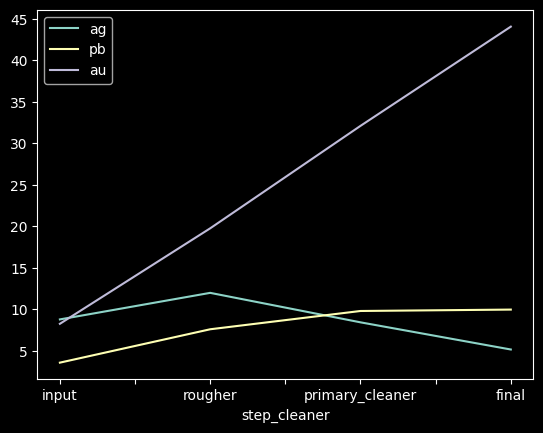

In [26]:
df_group.plot()

Концентрация золота растет при прохождении этапов очистки, концентрация свинца выросло незначительно, концентрация серебра немного увеличилась после флотации, а затем сильно уменьшилась.

### Сравним размеры гранул сырья тренировочных и тестовых данных, поступающих в флотационную установку

<AxesSubplot:ylabel='Density'>

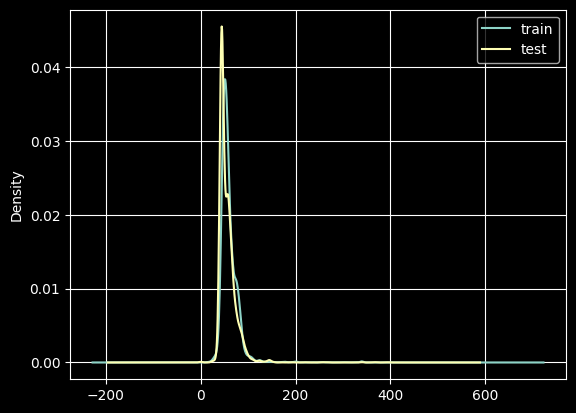

In [27]:
ax = dtrain.plot(kind='kde', y='rougher.input.feed_size', label='train')
dtest.plot(kind='kde', y='rougher.input.feed_size', label='test', ax=ax, grid=True, legend=True)

Построив крывые плотностей распределений отметим, что значительных отличий между ними нет, иначе бы модель предсказания концентрации золота была бы не корректна для сырья имеющего сильные отличия в размере

### Исследуем суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах

In [28]:
dtrain['rougher.input.concentrate'] = dtrain['rougher.input.feed_ag'] + dtrain['rougher.input.feed_pb'] + dtrain['rougher.input.feed_sol'] + dtrain['rougher.input.feed_au']
dtrain['rougher.output.concentrate'] = dtrain['rougher.output.concentrate_ag'] + dtrain['rougher.output.concentrate_pb'] + dtrain['rougher.output.concentrate_sol'] + dtrain['rougher.output.concentrate_au']
dtrain['primary_cleaner.concentrate'] = dtrain['primary_cleaner.output.concentrate_ag'] + dtrain['primary_cleaner.output.concentrate_pb'] + dtrain['primary_cleaner.output.concentrate_sol'] + dtrain['primary_cleaner.output.concentrate_au']
dtrain['final.concentrate'] = dtrain['final.output.concentrate_ag'] + dtrain['final.output.concentrate_pb'] + dtrain['final.output.concentrate_sol'] + dtrain['final.output.concentrate_au']

dtest['rougher.input.concentrate'] = dtest['rougher.input.feed_ag'] + dtest['rougher.input.feed_pb'] + dtest['rougher.input.feed_sol'] + dtest['rougher.input.feed_au']
df['rougher.input.concentrate'] = df['rougher.input.feed_ag'] + df['rougher.input.feed_pb'] + df['rougher.input.feed_sol'] + df['rougher.input.feed_au']

In [29]:
df['rougher.input.concentrate'] = df['rougher.input.feed_ag'] + df['rougher.input.feed_pb'] + df['rougher.input.feed_sol'] + df['rougher.input.feed_au']
df['rougher.output.concentrate'] = df['rougher.output.concentrate_ag'] + df['rougher.output.concentrate_pb'] + df['rougher.output.concentrate_sol'] + df['rougher.output.concentrate_au']
df['primary_cleaner.concentrate'] = df['primary_cleaner.output.concentrate_ag'] + df['primary_cleaner.output.concentrate_pb'] + df['primary_cleaner.output.concentrate_sol'] + df['primary_cleaner.output.concentrate_au']
df['final.concentrate'] = df['final.output.concentrate_ag'] + df['final.output.concentrate_pb'] + df['final.output.concentrate_sol'] + df['final.output.concentrate_au']

<AxesSubplot:ylabel='Frequency'>

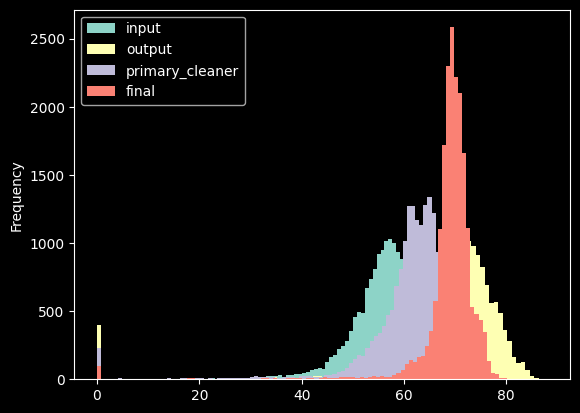

In [30]:
ax = df['rougher.input.concentrate'].plot(kind='hist', bins=100, label='input', legend=True)
ax = df['rougher.output.concentrate'].plot(kind='hist', bins=100, ax=ax, label='output', legend=True)
ax = df['primary_cleaner.concentrate'].plot(kind='hist', bins=100, ax=ax, label='primary_cleaner', legend=True)
df['final.concentrate'].plot(kind='hist', bins=100, ax=ax, label='final', legend=True)

После флотации смещается распределение концентрации в сторону увеличения  
После первичной очистки уменьшается общая концентрация, но увеличивается количество продукта с высокой концентрацией  
После вторичной очистки увеличивается как общая концентрация так и количество продукта с высокой концентрацией  
Есть значительное количество с околонулевой концентрацией

(0.0, 10.0)

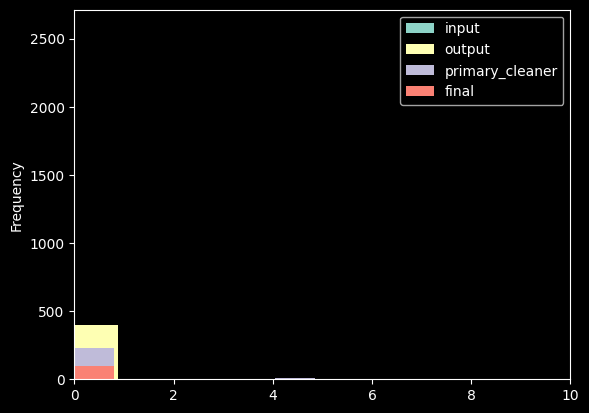

In [31]:
ax = df['rougher.input.concentrate'].plot(kind='hist', bins=100, label='input', legend=True)
ax = df['rougher.output.concentrate'].plot(kind='hist', bins=100, ax=ax, label='output', legend=True)
ax = df['primary_cleaner.concentrate'].plot(kind='hist', bins=100, ax=ax, label='primary_cleaner', legend=True)
df['final.concentrate'].plot(kind='hist', bins=100, ax=ax, label='final', legend=True)
plt.xlim(0,10)

На каждом из этапов есть практически нулевая концентрация веществ, но удалим только те строки где минимальная концентрация до флотации, нам нет смысла считать переработку руды с отсутствующей концентрацией веществ.

In [32]:
dtrain.drop(index=dtrain[dtrain['rougher.input.concentrate'] < 2].index, inplace=True)

In [33]:
dtest.drop(index=dtest[dtest['rougher.input.concentrate'] < 2].index, inplace=True)

In [34]:
df.drop(index=df[df['rougher.input.concentrate'] < 2].index, inplace=True)

In [35]:
dtrain.drop(index=dtrain.loc[dtrain.loc[:, 'rougher.output.recovery'] == 0].index, inplace=True)

In [36]:
dtrain.drop(index=dtrain.loc[dtrain.loc[:, 'final.output.recovery'] == 0].index, inplace=True)

Выяснили какие этапы очистки самые эффективные. Сверили распределения размеров сырья в тренировочной и тестовой таблице. Удалили данные с практически нулевой концентрацией нужных нам веществ перед флотацией.

## Модель

Напишем функцию sMAPE для метрики качества, она удобна заказчику, благодаря наглядности

In [37]:
def smape(target_val, predicted):
    predicted = pd.DataFrame(data=predicted, columns=target_val.columns, index=target_val.index)
    smape_rougher = (100 * abs(target_val[target_val.columns[0]] - predicted[predicted.columns[0]]) / ((abs(target_val[target_val.columns[0]]) + abs(predicted[predicted.columns[0]])) / 2)).mean()
    smape_final = (100 * abs(target_val[target_val.columns[1]] - predicted[predicted.columns[1]]) / ((abs(target_val[target_val.columns[1]]) + abs(predicted[predicted.columns[1]])) / 2)).mean()
    return (0.25 * smape_rougher + 0.75 * smape_final)

Подготовим признаки для модели  
В обучающей выборке используем лишь только те признаки, которые есть и в тестовой

In [38]:
features = dtrain[dtest.columns].drop(columns=['date']).reset_index(drop=True)
target = dtrain[['rougher.output.recovery', 'final.output.recovery']].reset_index(drop=True)

Обернем функцию для использования в GridSearchCV

In [39]:
my_score = make_scorer(smape, greater_is_better=False)

Подберем оптимальное дерево для использования его в модели решающего леса

In [40]:
model = DecisionTreeRegressor(random_state=12345)
parameters = {'max_depth':range(1, 11)}

In [41]:
clf = GridSearchCV(model, parameters, cv=100, scoring=my_score)

In [42]:
clf.fit(features, target)

GridSearchCV(cv=100, estimator=DecisionTreeRegressor(random_state=12345),
             param_grid={'max_depth': range(1, 11)},
             scoring=make_scorer(smape, greater_is_better=False))

In [43]:
clf.best_params_

{'max_depth': 5}

Лучшим параметром глубины для решающего дерева оказалось 3, дальше идет переобучение.

In [44]:
model = RandomForestRegressor(max_depth=5, random_state=12345)
parameters = {'n_estimators':range(30, 151, 30)}

In [45]:
clf = GridSearchCV(model, parameters, cv=5, scoring=my_score)

In [46]:
clf.fit(features, target)

GridSearchCV(cv=5,
             estimator=RandomForestRegressor(max_depth=5, random_state=12345),
             param_grid={'n_estimators': range(30, 151, 30)},
             scoring=make_scorer(smape, greater_is_better=False))

In [47]:
clf.best_params_

{'n_estimators': 30}

In [48]:
pred = clf.predict(features)

In [49]:
smape(target, pred)

6.600660382573823

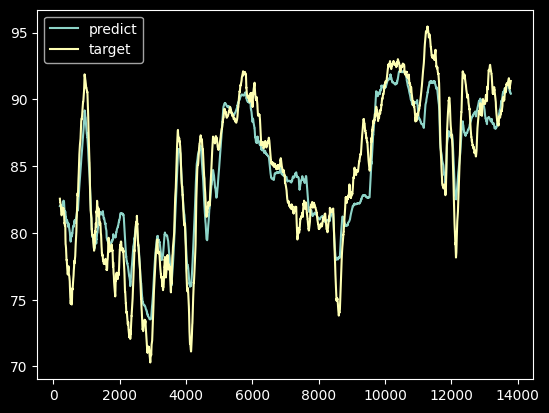

In [50]:
plt.plot(pd.Series(pred[:, 0]).rolling(200).mean(), label='predict')
plt.plot(target[target.columns[0]].rolling(200).mean(), label='target')
plt.legend()

In [51]:
model = LinearRegression()
clf = GridSearchCV(model, param_grid={}, cv=5, scoring=my_score)
clf.fit(features, target)

GridSearchCV(cv=5, estimator=LinearRegression(), param_grid={},
             scoring=make_scorer(smape, greater_is_better=False))

In [52]:
pr = clf.predict(features)

In [53]:
smape(target, pr)

7.2288525974185855

Модель случайного леса с параметрами, максимальной глубины дерева 5 и количеством деревьев 30 подойдет лучше чем линейная регрессия

Выделим целевой признак из основной таблицы для тестовой выборки

In [66]:
df.drop(index=df.loc[df.loc[:, 'rougher.output.recovery'] == 0].index, inplace=True)
df.drop(index=df.loc[df.loc[:, 'final.output.recovery'] == 0].index, inplace=True)

dt_new = dtest.merge(df[['date', 'rougher.output.recovery', 'final.output.recovery']], on='date', how='left')
dt_new.drop(columns='date', inplace=True)

dtest.drop(columns='date', inplace=True)

features_dt_new = dt_new[dtest.columns]
target_dt_new = dt_new[['rougher.output.recovery', 'final.output.recovery']]
target_dt_new = dt_new[['rougher.output.recovery', 'final.output.recovery']]

In [69]:
model = RandomForestRegressor(max_depth=5, n_estimators=30)
model.fit(features, target)
pred = model.predict(features_dt_new)
print('Итоговый вариант нашей метрики на тестовой выборке:', smape(target_dt_new, pred))

Итоговый вариант нашей метрики на тестовой выборке: 7.048904251058488


Сравним с константной моделью

In [86]:
pred_const_model = [[dtrain['rougher.output.recovery'].mean(), dtrain['final.output.recovery'].mean()]] * len(target_dt_new)

In [88]:
print('На константной модели', smape(target_dt_new, pred_const_model))

На константной модели 7.772902138220112


# Вывод

Нашли модель, у которой итоговая метрика дала результат добычи золота 7% и это лучше константной модели на 0,7 процентных пункта.